In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pickle
import pandas as pd

In [2]:
higgs_file = open ("higgs_100000_pt_250_500.pkl", 'rb')
qcd_file = open ("qcd_100000_pt_250_500.pkl", 'rb')

# QCD is background, Higgs is signal
qcd = pickle.load(qcd_file)
higgs = pickle.load(higgs_file)


print("pt = Transverse Momentum")
print("eta = Pseudo Rapidity")
print("phi = Azimuthal Angle")
print("mass = Mass")
print("ee2 = Energy Correlation Function 2")
print("ee3 = Energy Correlation Function 3")
print("d2 = Energy Correlation Function")
print("angularity = Jet broadness to thrust ratio")
print("t1 = subjettiness of degree 1")
print("t2 = subjettiness of degree 2") 
print("t3 = subjettiness of degree 3")
print("t21 = ratio of t2/t1")
print("t32 = ratio of t3/t2")
print("KtDeltaR = Delta R of two subjets within large-R jet")

pt = Transverse Momentum
eta = Pseudo Rapidity
phi = Azimuthal Angle
mass = Mass
ee2 = Energy Correlation Function 2
ee3 = Energy Correlation Function 3
d2 = Energy Correlation Function
angularity = Jet broadness to thrust ratio
t1 = subjettiness of degree 1
t2 = subjettiness of degree 2
t3 = subjettiness of degree 3
t21 = ratio of t2/t1
t32 = ratio of t3/t2
KtDeltaR = Delta R of two subjets within large-R jet


Above is a translation of the name of the data inside the dataset to what it represents. From this point on these may be used interchangeably in descriptions and labels. Anytime "QCD" is used (as in the name of the dataset), it refers to the simulation data. Anytime "Higgs" is used it refers to the pseudo-experiment data.

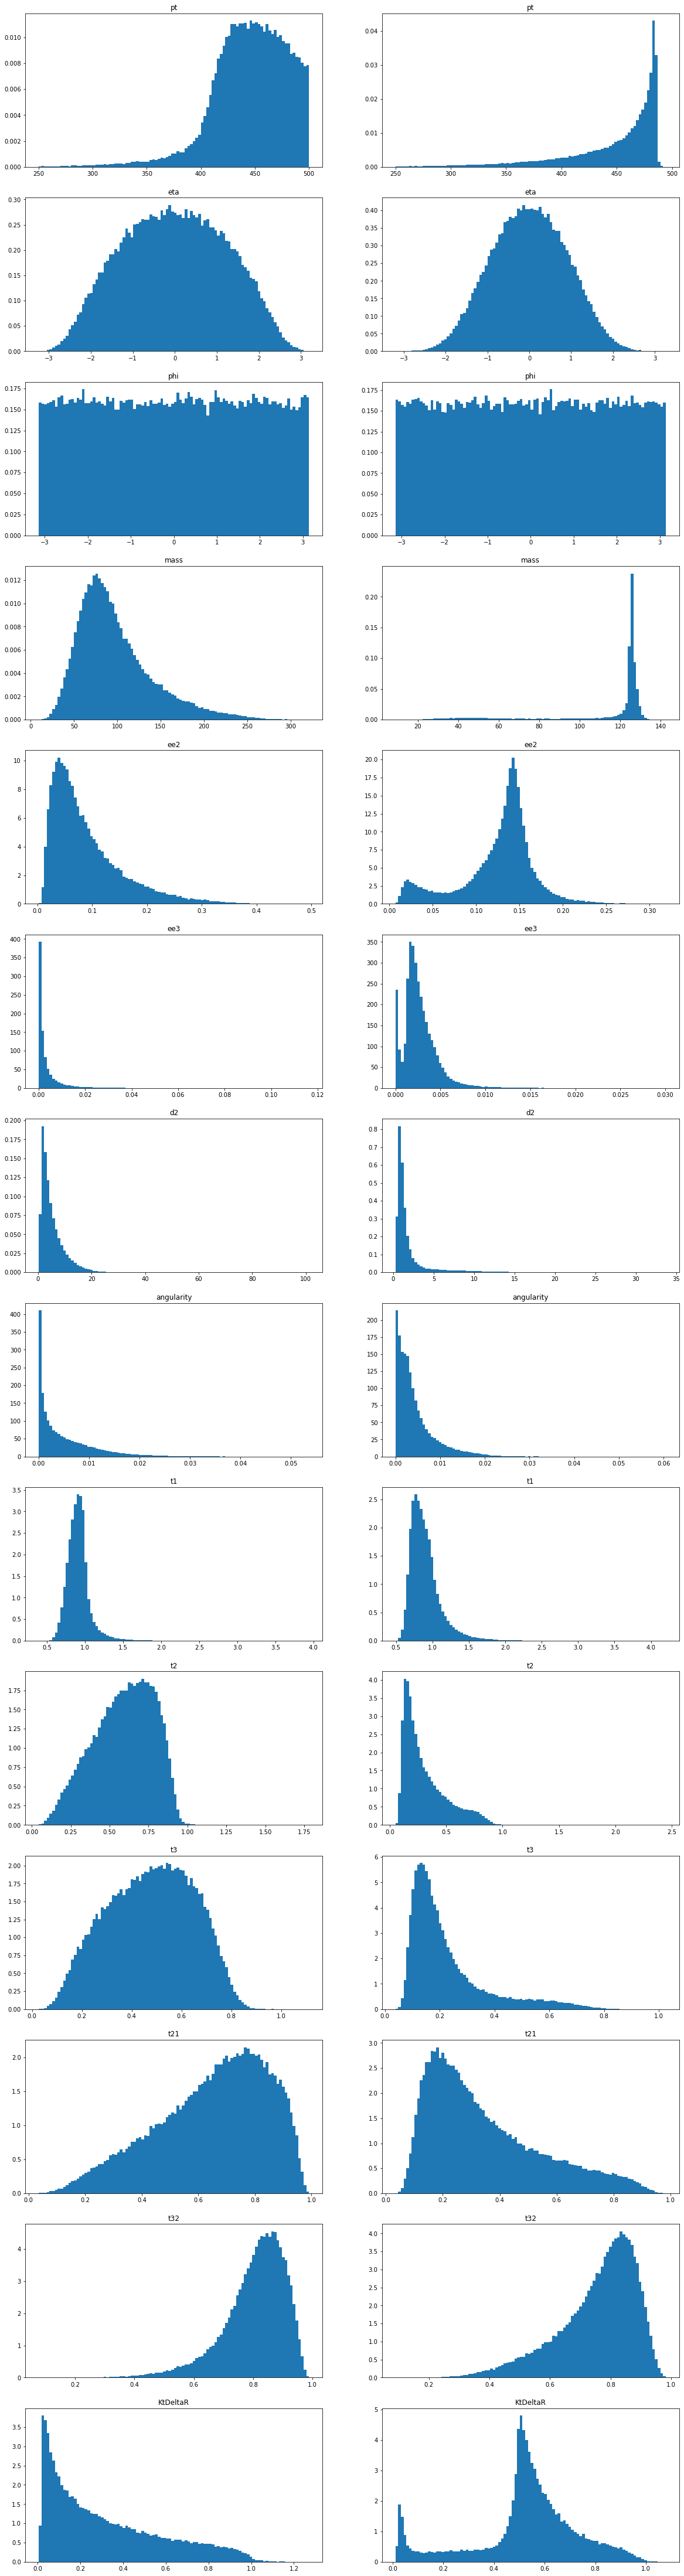

In [13]:
fig, ax = plt.subplots(14, 2, figsize = (20,80))

# First block of code graphs QCD simulation and Higgs pseudo-data on different graphs. To use this block make sure subplots is (14, 2).
i = 0
for key in qcd:
    ax[i, 0].hist(qcd[key], density = True, bins = 100)
    ax[i, 0].set_title(key)
    i += 1

i = 0
for key in higgs:
    ax[i, 1].hist(higgs[key], density = True, bins = 100)
    ax[i, 1].set_title(key)
    i = i + 1
    
# Second block of code graphs QCD simulation and Higgs pseudo-data on the same graph. To use this block make sure subplots is (14, 1).
# i = 0
# for key in qcd:
#     ax[i].hist(qcd[key], density = True, bins = 100)
#     ax[i].hist(higgs[key], density = True, bins = 100)
#     ax[i].set_title(key)
#     ax[i].legend(["QCD", "Higgs"])
#     i += 1

Above are graphs of the QCD and Higgs data. From these we can see (qualitatively) how the simulation and pseudo-experiment data line up for each of the measured values. Features where the two datasets line up well (such as phi) provide little discrimination power between the two datasets, features where the sets line up little provide larger discrimination power.

In [4]:
# fig, ax = plt.subplots(184, 2, figsize = (20,750))


# i = 0
# for key in qcd:
#     for key2 in qcd:
#         if key != key2:
#             ax[i, 0].hist2d(qcd[key], qcd[key2], density = True, bins = 200, cmap = 'jet')
#             ax[i, 0].set_xlabel(key)
#             ax[i, 0].set_ylabel(key2)
#             i += 1

# i = 0
# for key in higgs:
#     for key2 in higgs:
#         if key != key2:
#             ax[i, 1].hist2d(higgs[key], higgs[key2], density = True, bins = 200, cmap = 'jet')
#             ax[i, 1].set_xlabel(key)
#             ax[i, 1].set_ylabel(key2)
#             i = i + 1

# plt.show()

In [5]:
corr_coef = []
   
for key in qcd:
    for key2 in qcd:
        corr_coef.append([key, key2, stats.pearsonr(qcd[key], qcd[key2])])

vals = []
for key in qcd:
    for key2 in qcd:
        for i in range(len(corr_coef)):
            if corr_coef[i][0] == key and corr_coef[i][1] == key2:
                vals.append(corr_coef[i][2][0])

table_vals = []
for i in range(int(len(vals) / 14)):
    table_vals.append(vals[i*14:i*14 + 14])

df = pd.DataFrame(table_vals, index = pd.Index(qcd.keys()), columns = pd.Index(qcd.keys()))
    
print("Correlation Coefficients-")
df.style

Correlation Coefficients-


,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
pt,1.000000,0.001646,-0.002151,0.116106,-0.065045,-0.071166,0.044540,-0.006096,-0.015842,-0.015435,-0.012933,-0.010350,0.002034,-0.020723
eta,0.001646,1.000000,0.001982,0.000331,-0.000829,0.000016,0.003129,0.001901,0.001541,0.003722,0.001989,0.002678,-0.002362,0.002631
phi,-0.002151,0.001982,1.000000,0.001781,-0.000084,-0.001442,0.000616,0.002013,0.000068,0.003766,0.004418,0.003519,0.002664,-0.003412
mass,0.116106,0.000331,0.001781,1.000000,0.944705,0.823995,-0.609440,0.395267,0.047805,-0.518935,-0.597166,-0.571218,-0.369384,0.709354
ee2,-0.065045,-0.000829,-0.000084,0.944705,1.000000,0.888003,-0.660044,0.335057,0.161316,-0.519772,-0.613476,-0.621209,-0.412979,0.661513
ee3,-0.071166,0.000016,-0.001442,0.823995,0.888003,1.000000,-0.413854,0.346522,0.163273,-0.304939,-0.408181,-0.388633,-0.400095,0.533815
d2,0.044540,0.003129,0.000616,-0.609440,-0.660044,-0.413854,1.000000,-0.174517,-0.110423,0.505221,0.553272,0.600450,0.239771,-0.466225
angularity,-0.006096,0.001901,0.002013,0.395267,0.335057,0.346522,-0.174517,1.000000,0.013484,-0.069498,-0.099513,-0.090325,-0.109640,0.263082
t1,-0.015842,0.001541,0.000068,0.047805,0.161316,0.163273,-0.110423,0.013484,1.000000,0.285307,0.206263,-0.087536,-0.151472,-0.209706
t2,-0.015435,0.003722,0.003766,-0.518935,-0.519772,-0.304939,0.505221,-0.069498,0.285307,1.000000,0.934555,0.913813,0.057613,-0.675798


Above is a table of the correlation coefficients for each measured value. This shows how much the data types align with each other with a linear relationship. The values are from -1 to 1, with 0 being no correlation, 1 being completely correlated (i.e. the same), and a negative value showing negative correlation as opposed to positive correlation. This is similar to what a person would qualitatively read from a 2D density histogram of the two data types.

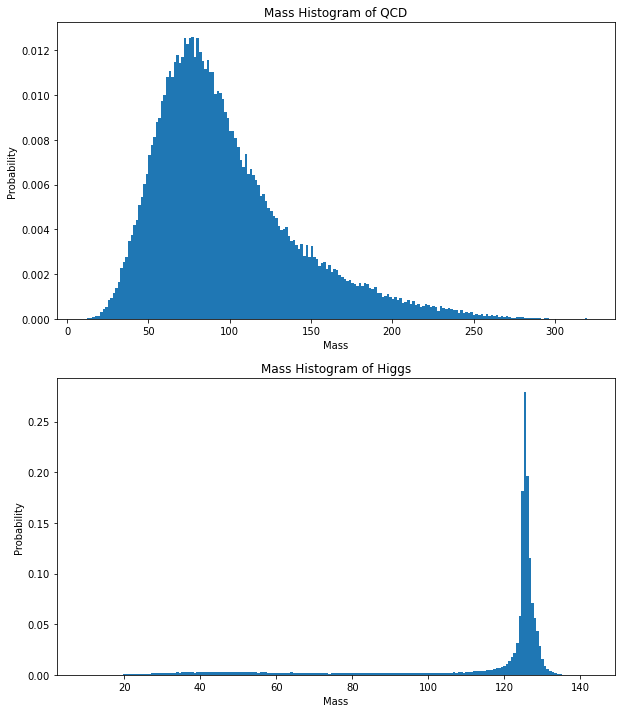

In [22]:
fig, ax = plt.subplots(2, 1, figsize = (10, 12))

ax[0].hist(qcd['mass'], bins = 200, density = True)
ax[1].hist(higgs['mass'], bins = 200, density = True)
ax[0].set_title('Mass Histogram of QCD')
ax[0].set_xlabel("Mass (GeV)")
ax[0].set_ylabel("Probability")
ax[1].set_title('Mass Histogram of Higgs')
ax[1].set_xlabel("Mass (GeV)")
ax[1].set_ylabel("Probability")
plt.show()

Using the above histograms (plotted on different axes to show features better), we can see that the most probable value of the Higgs Boson mass is about 125 GeV. From these we can calculate the significance of a 125 reading in the (normalized) QCD data by using an approprate Poisson approximation of the background. The parameter for the Poisson mean is obtained from the most probable value in the QCD graph, about 75. The graph of the QCD histogram and the analytical Poisson approximation for it are shown below.

0.36313541810112915 -0.350090425404716
0.360447788597821 0.35726213054705225


25.185202753827095

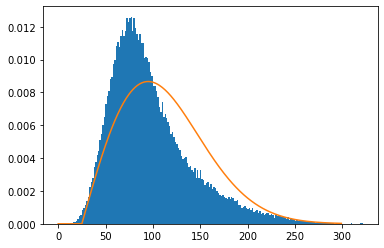

In [135]:
fig, ax = plt.subplots(1, 1)

ax.hist(qcd['mass'], bins = 200, density = True)

lin = np.arange(0, 300, 1)
pois = stats.poisson.pmf(lin, 75, loc = 0)
ray = stats.rayleigh.pdf(lin, loc = 25, scale = 70)
# ax.set_yscale('log')
ax.plot(lin, ray)

norm_mass = []
for i in range(len(qcd['mass'])):
    norm_mass.append(qcd['mass'][i])
    
norm_mass.sort()
index = 0
for i in range(len(norm_mass)):
    if(norm_mass[i] >= 125):
        index = i
        break

norm_mass = norm_mass / np.sum(norm_mass)
prob = np.sum(norm_mass[index:])

orig_sig = stats.norm.ppf(prob, loc = 0, scale = 1)
print(prob, orig_sig)

print(stats.rayleigh.sf(125, loc = 25, scale = 70), stats.norm.ppf(stats.rayleigh.cdf(125, loc = 25, scale = 70), loc = 0, scale = 1))
stats.rayleigh.ppf(3.5e-6, loc = 25, scale = 70)